In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

import re
from collections import Counter
import os

In [ ]:
df=pd.read_csv('/content/2020-04-30 Coronavirus Tweets.CSV', skiprows=lambda i: i!=0 and (i) % 1000 != 0)

In [ ]:
df.head()


,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
0,1255649026810228737,1240358180296810496,2020-04-30T00:03:51Z,Macaren95729685,Old and good panties.\n\n#diadelarbol\n#Quedat...,Twitter for Android,NaN,NaN,NaN,False,...,4,NaN,NaN,NaN,80,35,NaN,2020-03-18T19:23:39Z,False,en
1,1255650330236219392,1251310301644877825,2020-04-30T00:09:02Z,O3yFXTsN3SM5u1n,意識薄れていないかな。ランニングの時何でマスクしないのかな。息苦しいからって言うけど、コロナ...,Twitter for Android,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,0,0,NaN,2020-04-18T00:44:23Z,False,ja
2,1255651631309426690,1134231679839739904,2020-04-30T00:14:12Z,SharefilG,"Together, we fight the virus.\n#COVID19 #coron...",Twitter for Android,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,29,64,NaN,2019-05-30T22:54:40Z,False,en
3,1255652813994168326,981699274403704835,2020-04-30T00:18:54Z,KaySpeshel,This is kind of an interesting read about how...,Twitter for Android,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,119,269,NaN,2018-04-05T01:05:20Z,False,en
4,1255654128803405824,1047699561127366657,2020-04-30T00:24:07Z,anise084,「更新：緊急事態宣言 1か月程度延長する方向で調整」 #Coronavirus https:...,Twitter for Android,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,3321,4998,NaN,2018-10-04T04:06:55Z,False,ja


In [ ]:
# display columns
print ("original columns: ")
df.columns

# dropping columns
tweet = df.copy()
tweet.drop(['status_id','user_id','screen_name','source','reply_to_status_id','reply_to_user_id','is_retweet','place_full_name','place_type','reply_to_screen_name','is_quote','followers_count','friends_count','account_lang','account_created_at','verified'],axis=1, inplace = True)
tweet.head()

original columns: 


,created_at,text,favourites_count,retweet_count,country_code,lang
0,2020-04-30T00:03:51Z,Old and good panties.\n\n#diadelarbol\n#Quedat...,54,4,NaN,en
1,2020-04-30T00:09:02Z,意識薄れていないかな。ランニングの時何でマスクしないのかな。息苦しいからって言うけど、コロナ...,0,0,NaN,ja
2,2020-04-30T00:14:12Z,"Together, we fight the virus.\n#COVID19 #coron...",31,0,NaN,en
3,2020-04-30T00:18:54Z,This is kind of an interesting read about how...,7900,0,NaN,en
4,2020-04-30T00:24:07Z,「更新：緊急事態宣言 1か月程度延長する方向で調整」 #Coronavirus https:...,120792,0,NaN,ja


In [ ]:
# filtering data with 'country_code = US' and 'language = en'
# (tweet.country_code == "US") &
tweet =tweet[(tweet.lang == "en")].reset_index(drop = True)
tweet.drop(['country_code','lang'],axis=1,inplace=True)

# check missing values
# tweet.isna().sum()

tweet.head()

,created_at,text,favourites_count,retweet_count
0,2020-04-30T00:03:51Z,Old and good panties.\n\n#diadelarbol\n#Quedat...,54,4
1,2020-04-30T00:14:12Z,"Together, we fight the virus.\n#COVID19 #coron...",31,0
2,2020-04-30T00:18:54Z,This is kind of an interesting read about how...,7900,0
3,2020-04-30T00:33:54Z,Go screw yourselves! #ScrewCuomo #ScrewdeBlasi...,23824,0
4,2020-04-30T00:39:15Z,@pjmooney @SenSchumer @senatemajldr @GOPLeader...,37309,0


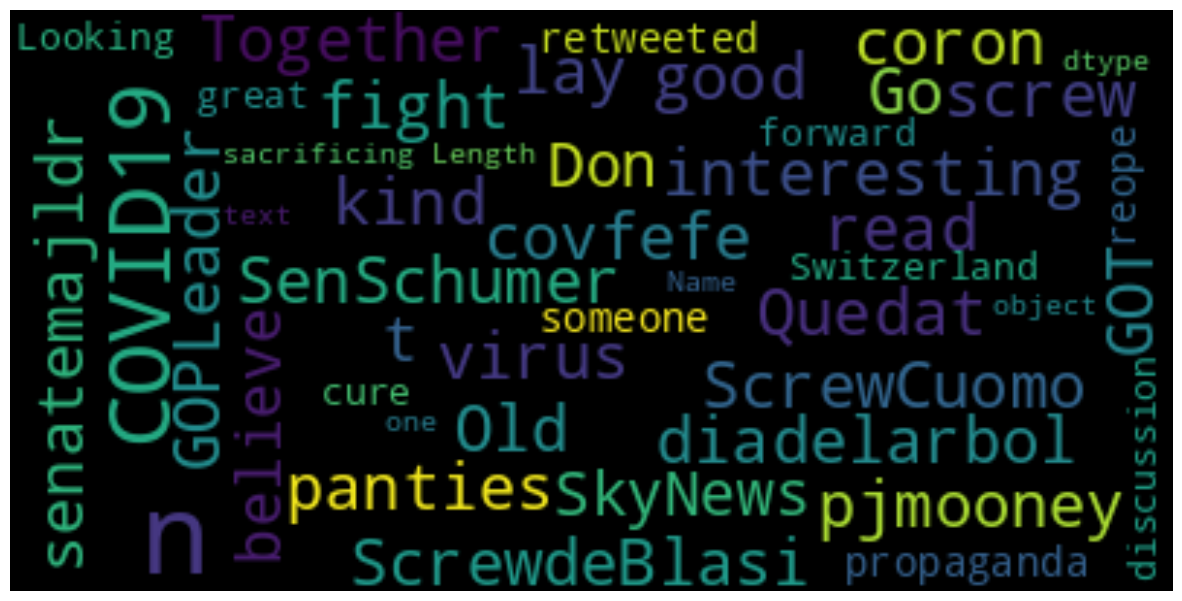

In [ ]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])

In [ ]:
# Extracting hashtags and accounts
stoptags = ['#covid19', '#covid_19', '#covid-19', '#covid', '#coronavirus', '#outgreak', '#virus', '#pandemic']

tweet['tags'] = tweet['text'].str.findall(r'(?:(?<=\s)|(?<=^))#.*?(?=\s|$|\.,)')
tweet['tags'] = tweet['tags'].apply(lambda word_list:list(map(lambda w: w.lower(), word_list))).apply(lambda word_list:list(filter(lambda w: w not in stoptags, word_list)))

tweet['accts'] = tweet['text'].str.findall(r'(?:(?<=\s)|(?<=^))@.*?(?=\s|$)')
tweet['entity_text'] = tweet['tags'].apply(' '.join) + ' ' + tweet['accts'].apply(' '.join)
tweet.head()

,created_at,text,favourites_count,retweet_count,tags,accts,entity_text
0,2020-04-30T00:03:51Z,Old and good panties.\n\n#diadelarbol\n#Quedat...,54,4,"[#diadelarbol, #quedateencasa, #diadeladanza, ...",[],#diadelarbol #quedateencasa #diadeladanza #ass...
1,2020-04-30T00:14:12Z,"Together, we fight the virus.\n#COVID19 #coron...",31,0,[#saintlucia],[],#saintlucia
2,2020-04-30T00:18:54Z,This is kind of an interesting read about how...,7900,0,[],[],
3,2020-04-30T00:33:54Z,Go screw yourselves! #ScrewCuomo #ScrewdeBlasi...,23824,0,"[#screwcuomo, #screwdeblasio]",[],#screwcuomo #screwdeblasio
4,2020-04-30T00:39:15Z,@pjmooney @SenSchumer @senatemajldr @GOPLeader...,37309,0,[],"[@pjmooney, @SenSchumer, @senatemajldr, @GOPLe...",@pjmooney @SenSchumer @senatemajldr @GOPLeade...


In [ ]:
# Tokenizing and Removing special charactors
for i in range(tweet.shape[0]) :
    tweet['text'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", tweet['text'][i]).split()).lower()
tweet['text'].head()

0    old and good panties diadelarbol quedateencasa...
1    together we fight the virus covid19 coronaviru...
2    this is kind of an interesting read about how ...
3    go screw yourselves screwcuomo screwdeblasio c...
4    jordan oh please even w no cure 98 of ppl surv...
Name: text, dtype: object

In [ ]:
#Removing Stop Words
stopwords

tweet['text'] = tweet['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
tweet['text'].head()

0    old good panties diadelarbol quedateencasa dia...
1    together fight virus covid19 coronavirus saint...
2    kind interesting read virus works amp attacks ...
3            go screw screwcuomo screwdeblasio covid19
4    jordan oh please even w cure 98 ppl survive co...
Name: text, dtype: object

In [ ]:
%time
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
pd.set_option('display.max_colwidth', 400)
tweet.head()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


,created_at,text,favourites_count,retweet_count,tags,accts,entity_text,sentiment,polarity
0,2020-04-30T00:03:51Z,old good panties diadelarbol quedateencasa diadeladanza assassinscreed voxparasitos covid19 coronavirus remdesivir survivor2020 welovejennie,54,4,"[#diadelarbol, #quedateencasa, #diadeladanza, #assassinscreed, #voxparasitos, #remdesivir, #survivor2020, #도겸아_도아해, #데이식스, #welovejennie]",[],#diadelarbol #quedateencasa #diadeladanza #assassinscreed #voxparasitos #remdesivir #survivor2020 #도겸아_도아해 #데이식스 #welovejennie,positive,0.4
1,2020-04-30T00:14:12Z,together fight virus covid19 coronavirus saintlucia,31,0,[#saintlucia],[],#saintlucia,neutral,0.0
2,2020-04-30T00:18:54Z,kind interesting read virus works amp attacks us covid19 coronavirus,7900,0,[],[],,positive,0.55
3,2020-04-30T00:33:54Z,go screw screwcuomo screwdeblasio covid19,23824,0,"[#screwcuomo, #screwdeblasio]",[],#screwcuomo #screwdeblasio,neutral,0.0
4,2020-04-30T00:39:15Z,jordan oh please even w cure 98 ppl survive covid19 purpose lockdown overwhelm hospitals social distance vaccine developed models millions rational ppl take precautions re done fear mongering,37309,0,[],"[@pjmooney, @SenSchumer, @senatemajldr, @GOPLeader, @LindseyGrahamSC, @SenMcSallyAZ, @Jim_Jordan, @PressSec, @WhiteHouse, @seanhannity]",@pjmooney @SenSchumer @senatemajldr @GOPLeader @LindseyGrahamSC @SenMcSallyAZ @Jim_Jordan @PressSec @WhiteHouse @seanhannity,positive,0.066667


neutral     32
positive    31
negative    25
Name: sentiment, dtype: int64


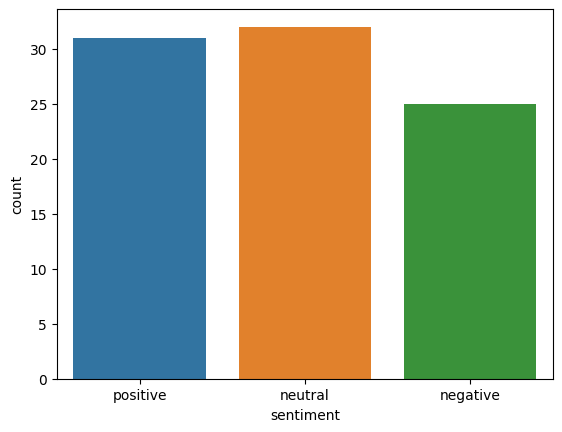

In [ ]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

In [ ]:
count = pd.DataFrame(tweet.groupby('sentiment')['favourites_count'].sum())
count.head()

,favourites_count
sentiment,
negative,258415
neutral,119595
positive,335806


In [ ]:
count = pd.DataFrame(tweet.groupby('sentiment')['retweet_count'].sum())
count.head()

,retweet_count
sentiment,
negative,124
neutral,28
positive,16


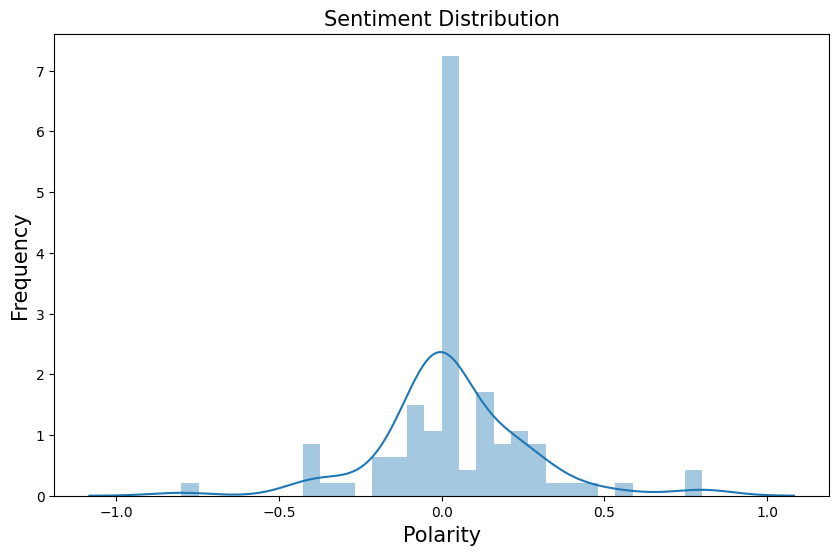

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

In [ ]:
# format timestamp
tweet['created_at'] = pd.to_datetime(tweet['created_at'])
tweet['created_at'] = pd.IntervalIndex(pd.cut(tweet['created_at'], pd.date_range('2020-03-29', '2020-05-01', freq='2880T'))).left

# count sentiment
tweet_count1 = tweet.groupby(['created_at','sentiment'])['text'].count().reset_index().rename(columns={'text':'count'})
tweet_count1.head()
# check missing values
tweet_count1.isna().sum()

created_at    0.0
sentiment     0.0
count         0.0
dtype: float64

In [ ]:
all_words = []
all_words = [word for i in tweet.entity_text for word in i.split()]
pos_words = tweet['entity_text'][tweet['sentiment'] == 'positive']
neg_words = tweet['entity_text'][tweet['sentiment'] == 'negative']
neutral_words = tweet['entity_text'][tweet['sentiment'] == 'neutral']
# show_wordcloud(pos_words , 'POSITIVE')
# show_wordcloud(neg_words , 'NEGATIVE')
# show_wordcloud(neutral_words , 'NEUTRAL')

def get_freq(word_list):
    freq = Counter(word_list).most_common(100)
    freq = pd.DataFrame(freq)
    freq.columns = ['word', 'frequency']
    return freq

all_freq = get_freq(all_words)
pos_freq = get_freq([word for i in pos_words for word in i.split()])
neg_freq = get_freq([word for i in neg_words for word in i.split()])

freq = pd.merge(all_freq,pos_freq,on='word',how='left').rename(columns={'frequency_x':'total','frequency_y':'pos'})
freq = pd.merge(freq,neg_freq,on='word',how='left').rename(columns={'frequency':'neg'}).fillna(0)
freq['score'] = (freq['pos'] - freq['neg'] ) / freq['total']

neg_freq_filtered = freq[(freq['score'] < 0.2) & (freq['neg'] > 0)].head(40).sort_values('score',ascending = True)

neg_freq_filtered.head(40)

,word,total,pos,neg,score
70,#life,1,0.0,1.0,-1.000000
78,#afrohouse,1,0.0,1.0,-1.000000
77,#deephouse,1,0.0,1.0,-1.000000
76,#housemusic,1,0.0,1.0,-1.000000
75,#djanetop100,1,0.0,1.0,-1.000000
74,#djane,1,0.0,1.0,-1.000000
73,#femaledj,1,0.0,1.0,-1.000000
72,#music,1,0.0,1.0,-1.000000
71,#dj,1,0.0,1.0,-1.000000
79,#disco,1,0.0,1.0,-1.000000


In [ ]:
#Positive
freq[(freq['score'] >0.4) & (freq['pos'] !=0)].head(40).sort_values('score',ascending = False)

,word,total,pos,neg,score
32,@SenMcSallyAZ,1,1.0,0.0,1.0
57,#americans,1,1.0,0.0,1.0
35,@WhiteHouse,1,1.0,0.0,1.0
36,@seanhannity,1,1.0,0.0,1.0
42,#polis,1,1.0,0.0,1.0
43,#copolitics,1,1.0,0.0,1.0
46,#fucktrump,1,1.0,0.0,1.0
55,#jaredkushner,1,1.0,0.0,1.0
56,#dead,1,1.0,0.0,1.0
58,@NYDailyNews,1,1.0,0.0,1.0


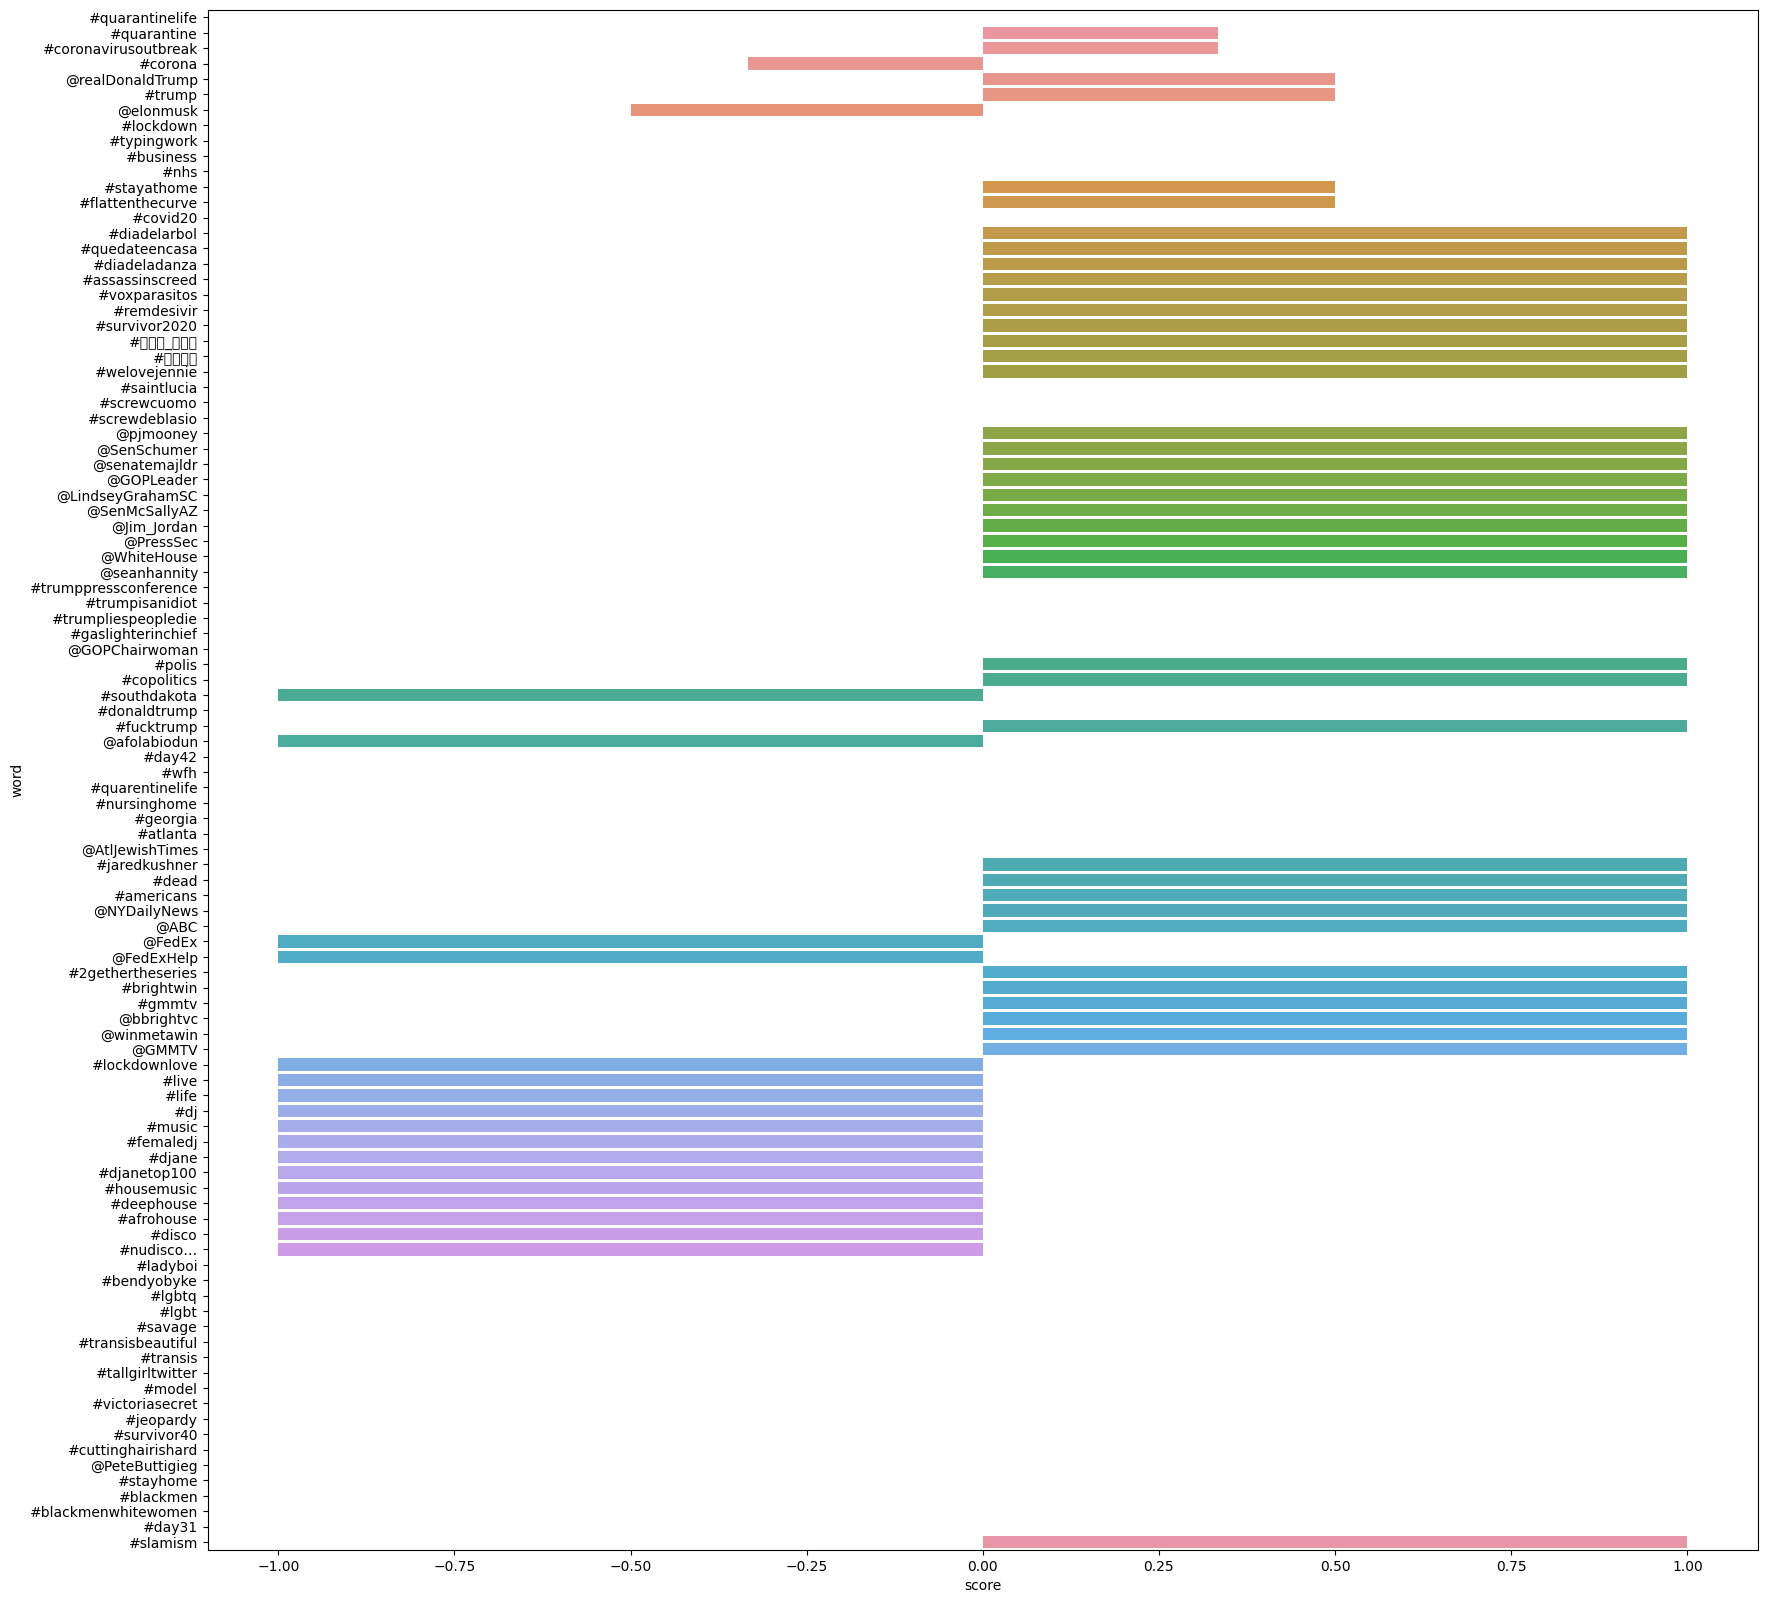

In [ ]:
altoplt.figure(figsize = (20, 20))
sns.barplot(y="word", x="score",data=freq);